# Google Data Analytics Professional Certificate 
> ## Case Study 2 - Bellabeat Data Analysis Project

version: 2022-03-08

### 1. Ask - A clear statement of the business task
- What is the problem I am trying to solve?
> - What are some trends in smart device usage?
> - How could these trends apply to Bellabeat customers?
> - How could these trends help influence Bellabeat marketing strategy?

- Key stakeholders:
> - Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
> - Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
> - Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.

In [1]:
# Setting up my environment
import pandas as pd
import numpy as np
from plotnine import * # ggplot for python
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from IPython.display import display

# other
import statsmodels.api as sm
import statsmodels.formula.api as smf

os.chdir('/Users/lauchunlok/Desktop/Google Data Analytics/Case Study 2/archive/Fitabase Data 4.12.16-5.12.16')
#pd.set_option('float_format', '{:f}'.format)

In [2]:
os.listdir()

['.Rhistory',
 'minutes_level',
 'hourly_level',
 'Case Study 2 Exercise R Script.R',
 'heartrate_seconds_merged.csv',
 'daily_level',
 '.ipynb_checkpoints',
 'weightLogInfo_merged.csv']

### 2. Prepare - A description of all data sources used

- Where is your data located?
> FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. And it has 18 csv files.

- How is the data organized? How are you addressing licensing, privacy, security, and accessibility?
> Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

- How did you verify the data’s integrity? 
> Data is collected in 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant. A sample size of 30 FitBit users is not representative of the entire population.

- Are there any problems with the data?
> These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. As data is collected through survey, we are not able to ensure the integrity or accuracy of data.

- Are there issues with bias or credibility in this data? Does your data ROCCC?
> - Reliable - LOW - Not reliable as it only has 30 respondents
> - Original - LOW - Third party provider (Amazon Mechanical Turk)
> - Comprehensive - MED - Parameters match most of Bellabeat's products' parameters
> - Current - LOW - Data is collected in 2016 which is 5 years from now and is not relevant
> - Cited - LOW - Data collected from third party, hence unknown. 

- How does it help you answer your question?
> **Overall, the data is considered as bad data source and is not recommended to produce business recommendations based on this data. These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. These dataset was not first hand data. The data collection period was short as the duration was only 1 month.**

### 3. Process - Documentation of any cleaning or manipulation of data
- What tools are you choosing and why?
> I choose to do my analysis in Python because it contains 18 csv files. Though the size of sample is small, it is easier to read all the files at once in Python than in Excel. And the reason why I chose Python over R is because I want to practice visualizations is Python.

- Have you ensured your data’s integrity? 
- What steps have you taken to ensure that your data is clean? 
- How can you verify that your data is clean and ready to analyze? 
- Have you documented your cleaning process so you can review and share those results?
> Data integrity refer to the accuracy, completeness, consistency, and trustworthiness of data throughout its lifecycle. Few validations, e.g. Data type, Data type, Data range, Mandatory, Unique) will be performed on the dataset in the following

In [3]:
# dailyActivity_merged cover all the data in dailyCalories_merged, dailyIntensities_merged and dailySteps_merged
daily_activity = pd.read_csv('daily_level/dailyActivity_merged.csv') 

In [4]:
# daily_sleep table
daily_sleep = pd.read_csv('daily_level/sleepDay_merged.csv')

In [5]:
# hourly
hourly_calories = pd.read_csv('hourly_level/hourlyCalories_merged.csv')
hourly_intensities = pd.read_csv('hourly_level/hourlyIntensities_merged.csv')
hourly_steps = pd.read_csv('hourly_level/hourlySteps_merged.csv')
# check the len
print(len(hourly_calories), len(hourly_intensities), len(hourly_steps))

# Merge 3 hourly related dfs into 1:
hourly_activity = hourly_calories.merge(hourly_intensities, on = ['Id', 'ActivityHour'])
hourly_activity = hourly_activity.merge(hourly_steps, on = ['Id', 'ActivityHour'])

22099 22099 22099


In [6]:
# weightlog
weightlog = pd.read_csv('weightLogInfo_merged.csv')

# heartrate
heartrate = pd.read_csv('heartrate_seconds_merged.csv')

#### Exploring a few key tables

#### There are totally 5 dataset to look into:
1. daily_activity
2. daily_sleep
3. hourly_activity
4. weightlog
5. heartrate

In [7]:
def explore_tables(df):
    # Show size
    print(df.shape)
    
    display(df.head())

    # look at the # of missing points in all columns
    print("\nColumns that have null values:", df.columns[df.isnull().any()].tolist())

    # Check mixed type
    print("Columns that have mixed type:")
    for column in df.columns:
        if ("mixed" in pd.api.types.infer_dtype(df[column])):
            print(column.ljust(50),':', pd.api.types.infer_dtype(df[column]))
    
    # Check duplicates
    # Check number of duplicates while ignoring the index feature
    n_duplicates = df.duplicated().sum()#df.drop(labels=["Id"], axis=1).duplicated().sum()
    print(f"You seem to have {n_duplicates} duplicates in your database.")

    # missing per sample
    msno.matrix(df, labels=True, sort="descending")
    plt.show()
    
    # missing per features
    df.isna().mean().sort_values().plot(
        kind="bar", figsize=(15, 4),
        title="Percentage of missing values per feature",
        ylabel="Ratio of missing values per feature")
    
    plt.show()

    # get a concise summary of the dataframe
    print(f'\nSummary:')
    print(df.info())
    

(940, 15)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863



Columns that have null values: []
Columns that have mixed type:
You seem to have 0 duplicates in your database.


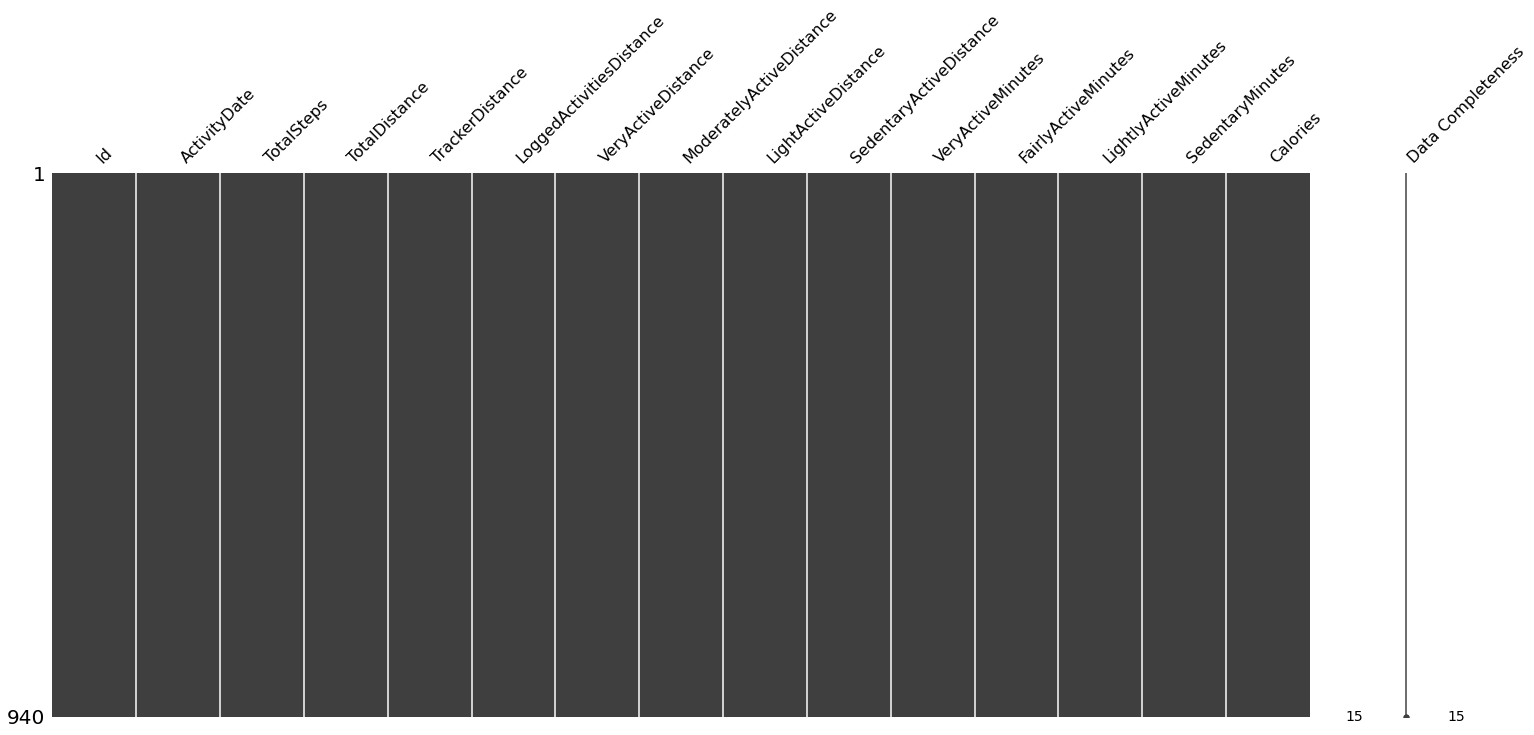

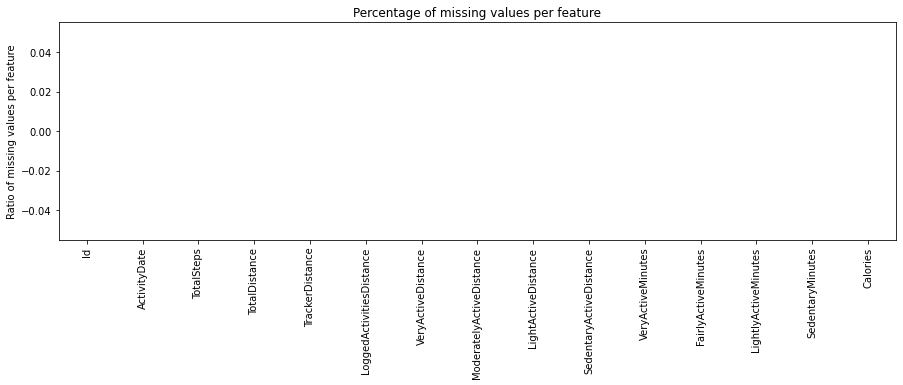


Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  

In [8]:
explore_tables(daily_activity)

(413, 5)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712



Columns that have null values: []
Columns that have mixed type:
You seem to have 3 duplicates in your database.


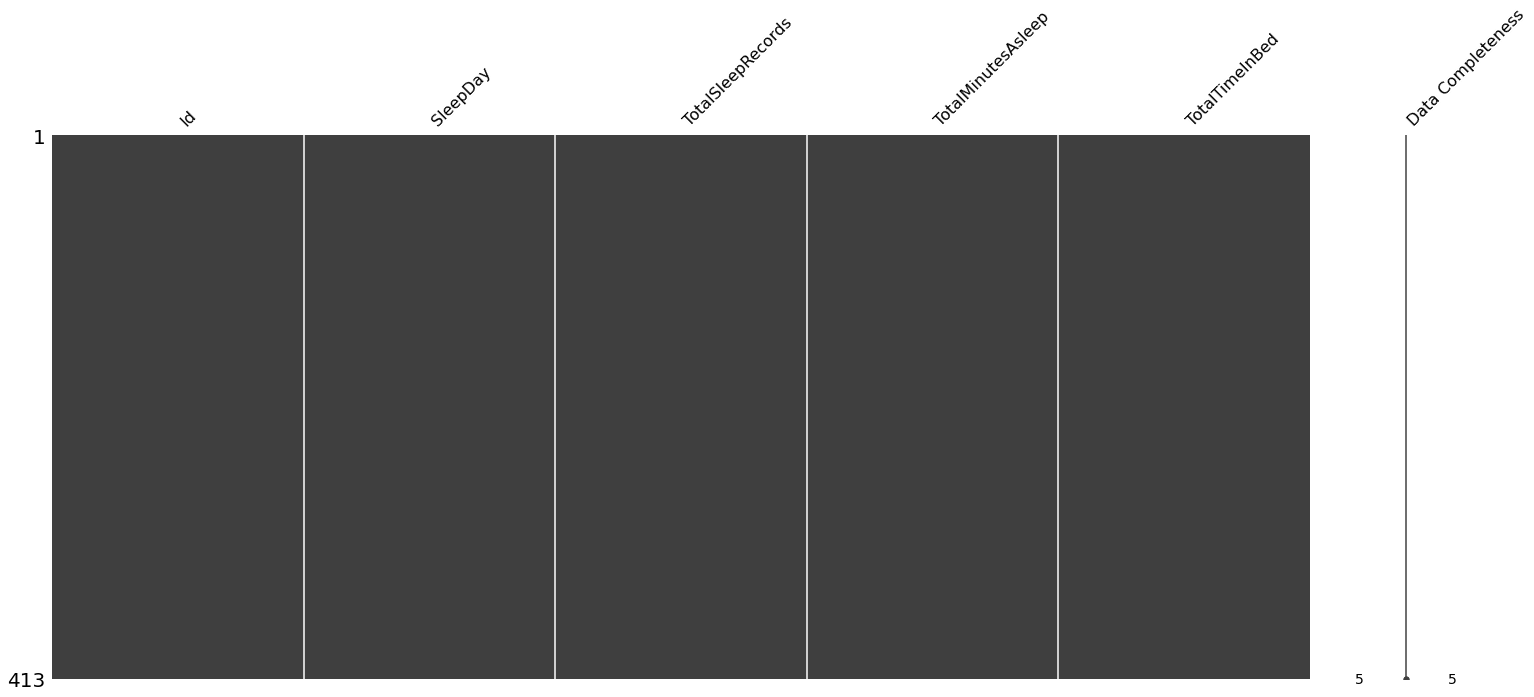

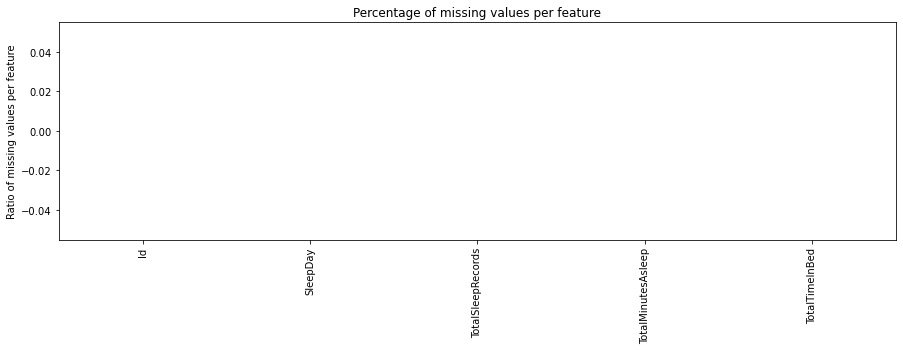


Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB
None


In [9]:
explore_tables(daily_sleep)

(22099, 6)


,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
3,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
4,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0



Columns that have null values: []
Columns that have mixed type:
You seem to have 0 duplicates in your database.


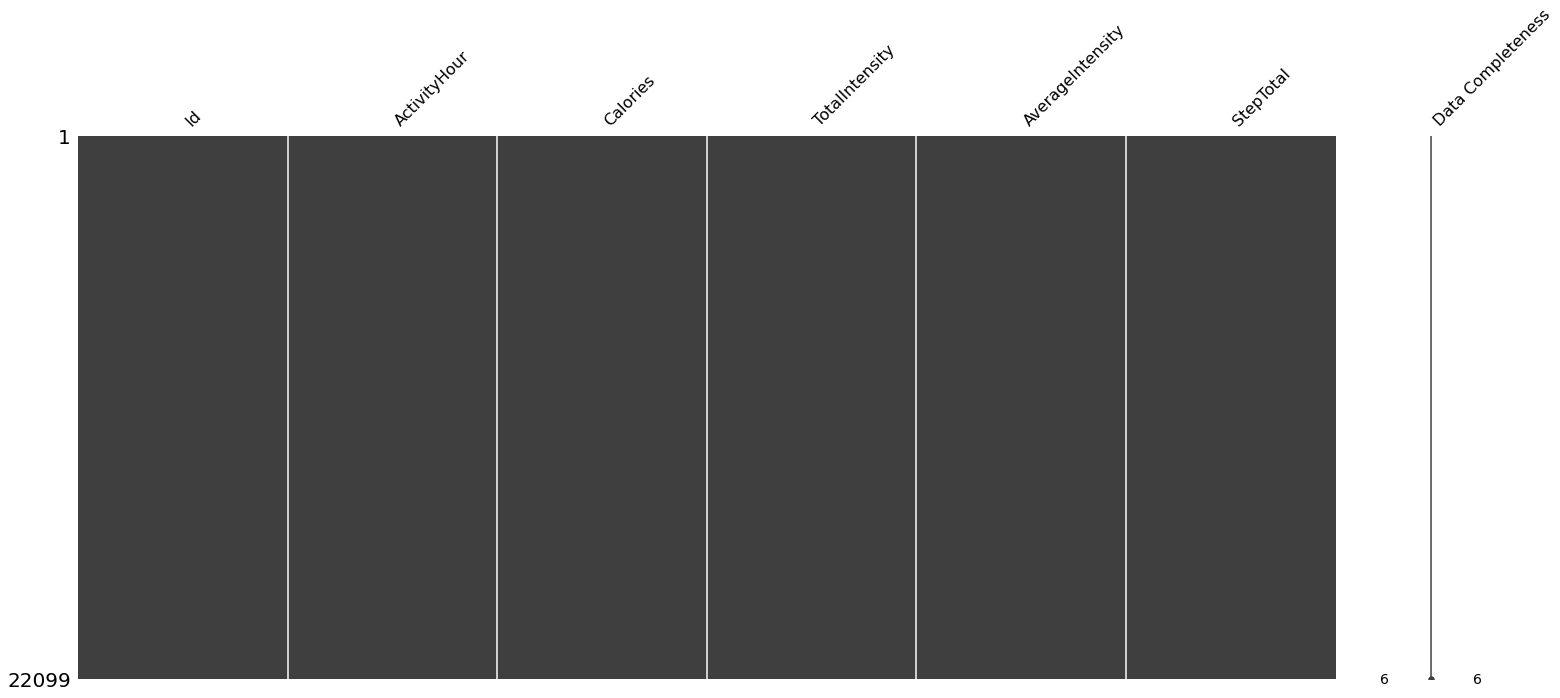

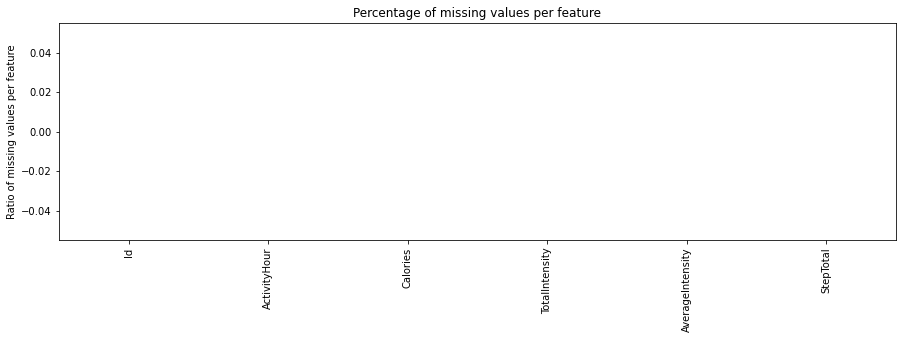


Summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   Calories          22099 non-null  int64  
 3   TotalIntensity    22099 non-null  int64  
 4   AverageIntensity  22099 non-null  float64
 5   StepTotal         22099 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.2+ MB
None


In [10]:
explore_tables(hourly_activity)

(67, 8)


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000



Columns that have null values: ['Fat']
Columns that have mixed type:
You seem to have 0 duplicates in your database.


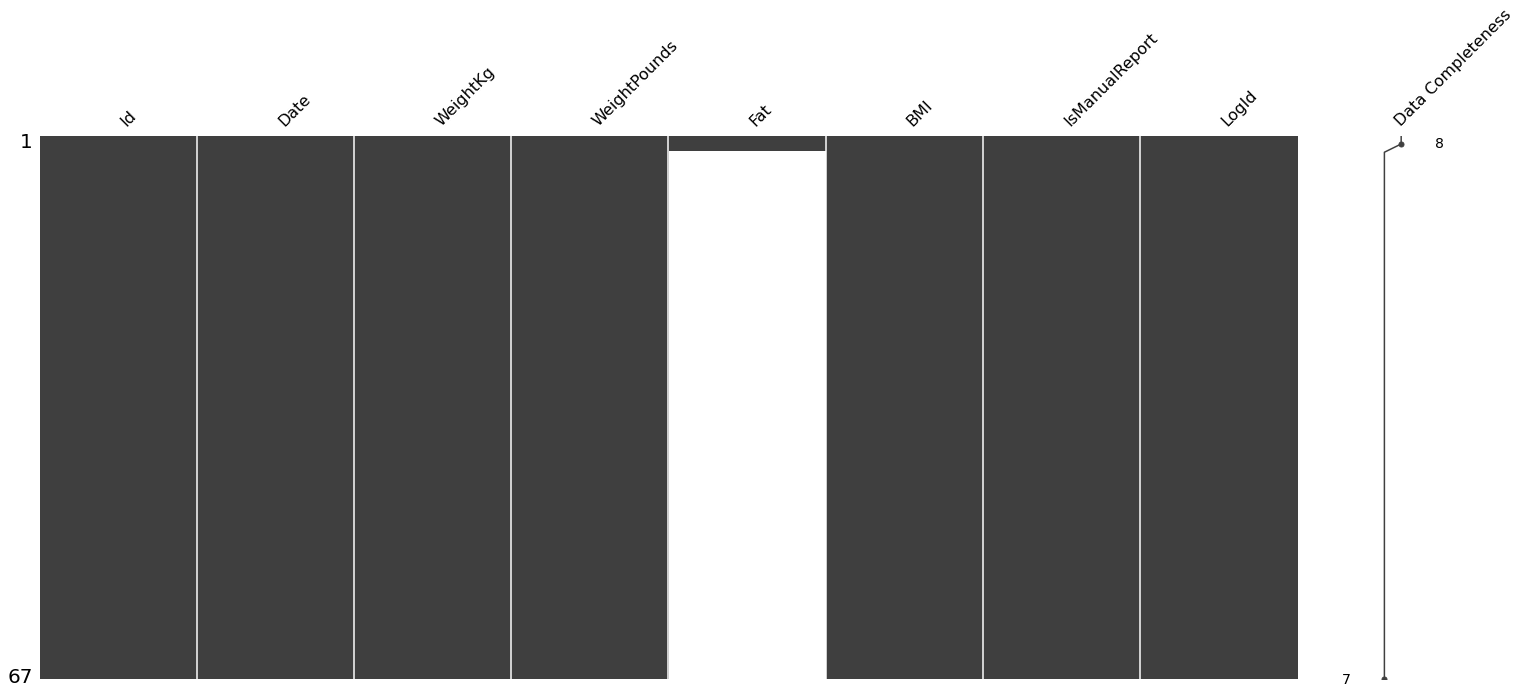

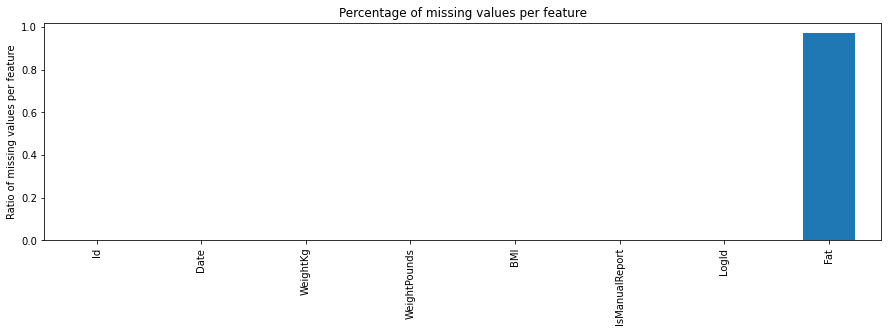


Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB
None


In [11]:
explore_tables(weightlog)

(2483658, 3)


,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101



Columns that have null values: []
Columns that have mixed type:
You seem to have 0 duplicates in your database.


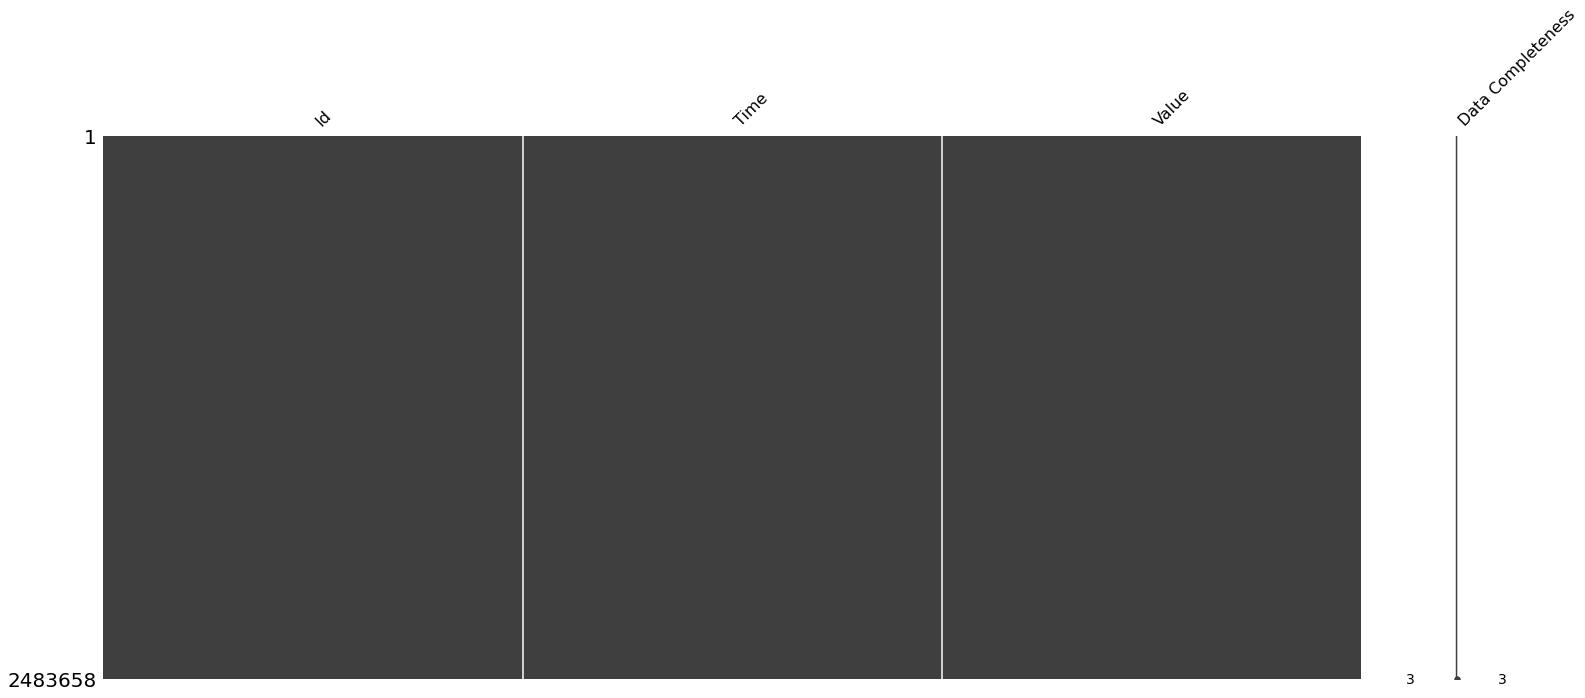

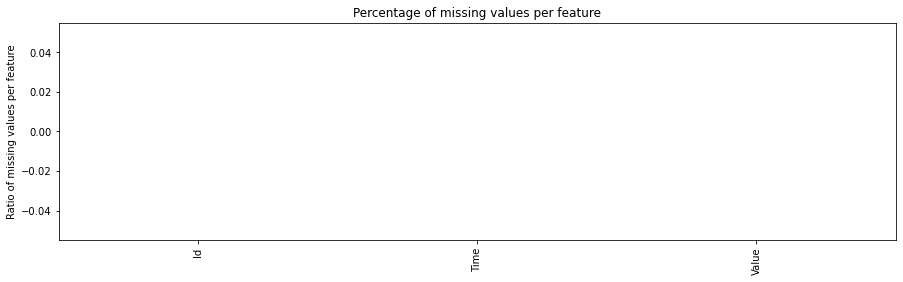


Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB
None


In [12]:
explore_tables(heartrate)

### Proper formatting

In [13]:
# Activity
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

# Sleep
daily_sleep["SleepDay"] = pd.to_datetime(daily_sleep["SleepDay"], format="%m/%d/%Y %I:%M:%S %p")

# Hourly Activity 
hourly_activity['ActivityHour'] = pd.to_datetime(hourly_activity['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")

hourly_activity['day'] = hourly_activity['ActivityHour'].dt.date
hourly_activity['time'] = hourly_activity['ActivityHour'].dt.time

# Weight Log
weightlog['Date'] = pd.to_datetime(weightlog['Date'], format="%m/%d/%Y %I:%M:%S %p")

weightlog['day'] = weightlog['Date'].dt.date.astype('datetime64')
weightlog['time'] = weightlog['Date'].dt.time

# Heartrate
heartrate['Time'] = pd.to_datetime(heartrate['Time'], format="%m/%d/%Y %I:%M:%S %p")

heartrate['day'] = heartrate['Time'].dt.date.astype('datetime64')
heartrate['time'] = heartrate['Time'].dt.time

In [14]:
# for checking
# explore_tables(heartrate)

#### Note that there were more participant Ids in the daily activity dataset than in daily sleep dataset. 
#### Consider using 'outer_join' / 'left_join' to keep those in the dataset. 

### Question 1: How many unique participants are there in each dataframe?

In [15]:
print(daily_activity['Id'].nunique())
print(daily_sleep['Id'].nunique())
print(hourly_activity['Id'].nunique())
print(heartrate['Id'].nunique())
print(weightlog['Id'].nunique())

33
24
33
14
8


### Answer 1

By looking at the missing value from the dataset, we can see that user did not use the device during sleeping.

Bellabeat can smaller the size the device(Leaf) which user can put it 24/7 as part the body like a necklace.

Combined with the minimal record observed in heartrate and weightlog dataset, it also indicated that the functionality of the device (Time) needs improvement.

#### Understanding some summary statistics

In [16]:
daily_activity[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'Calories']].describe()

,TotalSteps,TotalDistance,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,991.210638,2303.609574
std,5087.150742,3.924606,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,729.750000,1828.500000
50%,7405.500000,5.245000,1057.500000,2134.000000
75%,10727.000000,7.712500,1229.500000,2793.250000
max,36019.000000,28.030001,1440.000000,4900.000000


In [17]:
daily_activity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].describe()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes
count,940.000000,940.000000,940.000000
mean,21.164894,13.564894,192.812766
std,32.844803,19.987404,109.174700
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,127.000000
50%,4.000000,6.000000,199.000000
75%,32.000000,19.000000,264.000000
max,210.000000,143.000000,518.000000


In [18]:
daily_sleep[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']].describe()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.000000,413.000000,413.000000
mean,1.118644,419.467312,458.639225
std,0.345521,118.344679,127.101607
min,1.000000,58.000000,61.000000
25%,1.000000,361.000000,403.000000
50%,1.000000,433.000000,463.000000
75%,1.000000,490.000000,526.000000
max,3.000000,796.000000,961.000000


In [19]:
hourly_activity['Calories'].describe()

count    22099.000000
mean        97.386760
std         60.702622
min         42.000000
25%         63.000000
50%         83.000000
75%        108.000000
max        948.000000
Name: Calories, dtype: float64

Some interesting discoveries from this summary:

Average sedentary time is 991 minutes or 16 hours. Definately needs to be reduced!

The majority of the participants are lightly active.

On the average, participants sleep 1 time for 7 hours.

Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking **8,000** steps per day was associated with a **51%** lower risk for all-cause mortality (or death from all causes). Taking **12,000** steps per day was associated with a **65%** lower risk compared with taking 4,000 steps.

In [20]:
daily_sleep.groupby('Id')['Id'].count()

Id
1503960366    25
1644430081     4
1844505072     3
1927972279     5
2026352035    28
2320127002     1
2347167796    15
3977333714    28
4020332650     8
4319703577    26
4388161847    24
4445114986    28
4558609924     5
4702921684    28
5553957443    31
5577150313    26
6117666160    18
6775888955     3
6962181067    31
7007744171     2
7086361926    24
8053475328     3
8378563200    32
8792009665    15
Name: Id, dtype: int64

### 4. Analyze - A summary of your analysis
> - How should you organize your data to perform analysis on it?
> - Has your data been properly formatted?
> - What surprises did you discover in the data?
> - What trends or relationships did you find in the data?
> - How will these insights help answer your business questions?

### Daily Activity dataset

In [21]:
daily_activity['day_name'] = pd.to_datetime(daily_activity['ActivityDate']).dt.day_name()

daily_activity['day_name'] = pd.Categorical(daily_activity['day_name'], 
                                            categories= ['Monday','Tuesday','Wednesday',
                                                     'Thursday','Friday','Saturday', 'Sunday'],
                                            ordered=True)

### Question 2: What's the user's activity by days?

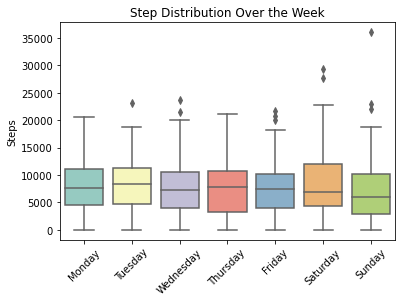

In [22]:
#Steps
sns.boxplot(x = 'day_name', y = 'TotalSteps', data = daily_activity, palette="Set3") 
 ## plot the dots over the box plots.
# sns.swarmplot(x='day_name',
#                y='TotalSteps', 
#               data=daily_activity, 
#               color='k',  #black dots
#               alpha = 0.5)
plt.title('Step Distribution Over the Week')
plt.xticks(rotation=45)
plt.ylabel("Steps")
plt.xlabel("")
plt.show()

<AxesSubplot:title={'center':'Distribution of daily step'}, ylabel='step_group'>

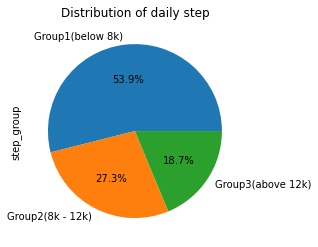

In [23]:
# reach 8000 steps per day
conditions = [
    (daily_activity['TotalSteps'] < 8000),
    ((daily_activity['TotalSteps'] >= 8000) & (daily_activity['TotalSteps'] < 12000)),
    ((daily_activity['TotalSteps'] > 12000))
]

choices = ['Group1(below 8k)', 'Group2(8k - 12k)', 'Group3(above 12k)']

daily_activity['step_group'] = np.select(conditions, choices)


plt.title('Distribution of daily step')
daily_activity.step_group.value_counts().plot(kind='pie', autopct='%1.1f%%')

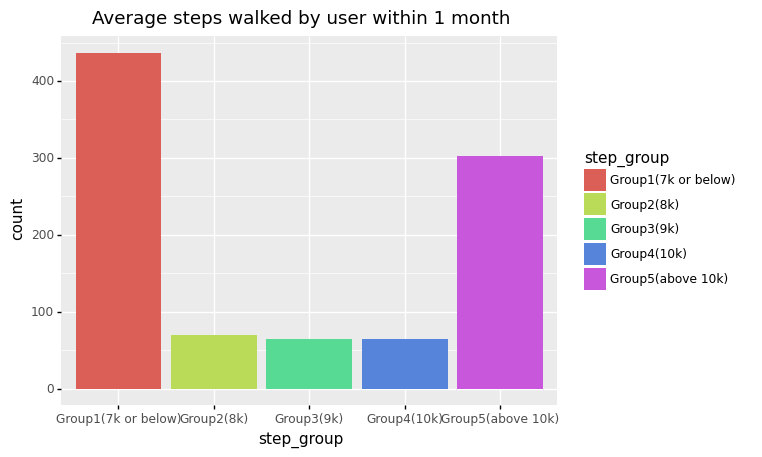

<ggplot: (8780529564260)>

In [24]:
conditions = [
    (daily_activity['TotalSteps'] <= 7000),
    ((daily_activity['TotalSteps'] > 7000) & (daily_activity['TotalSteps'] <= 8000)),
    ((daily_activity['TotalSteps'] > 8000) & (daily_activity['TotalSteps'] <= 9000)),
    ((daily_activity['TotalSteps'] > 9000) & (daily_activity['TotalSteps'] <= 10000)),
    (daily_activity['TotalSteps'] > 10000),
]

choices = ['Group1(7k or below)', 'Group2(8k)', 'Group3(9k)', 'Group4(10k)', 'Group5(above 10k)']

daily_activity['step_group'] = np.select(conditions, choices)


(ggplot(daily_activity) + 
 geom_bar(aes(x='step_group', y='..count..', fill='step_group')) + 
 ggtitle('Average steps walked by user within 1 month')
)

### Answer 2

The user's activity is fairly stable across the week. By looking at the walking steps average, majority of the user have less than 7k walking steps per day.

### Question 3: What's the relationship between calories and steps?

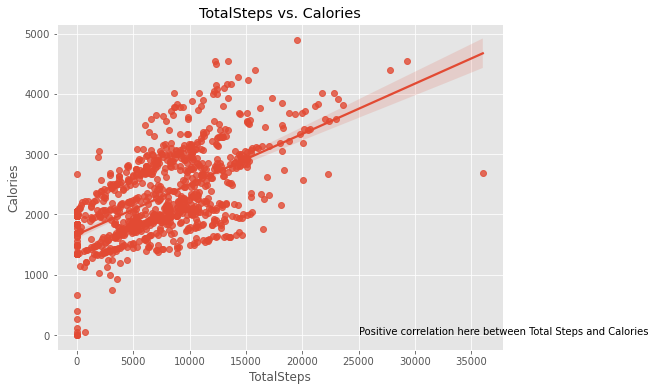

In [25]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))

t = ("Positive correlation here between Total Steps and Calories")
plt.text(25000, 1, t, ha='left', wrap=True)
plt.title('TotalSteps vs. Calories')
sns.regplot(data = daily_activity, x = "TotalSteps", y = "Calories")
plt.show()

### Answer 3

A positive relationship is observed between Total Steps and Calories

### Question 4: What's the relationship between steps taken in a day and sedentary minutes?

/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


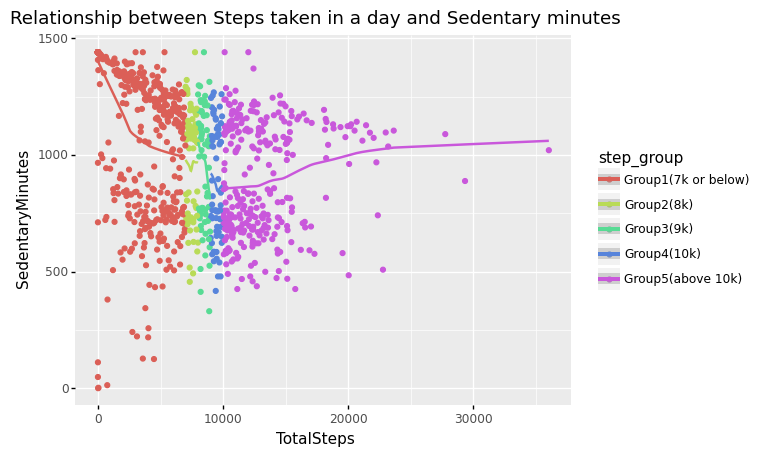

<ggplot: (8780530211810)>

In [26]:

(ggplot(daily_activity, aes(x='TotalSteps', y='SedentaryMinutes', color='step_group')) + 
 geom_point() + 
 geom_smooth() + 
 ggtitle('Relationship between Steps taken in a day and Sedentary minutes')

)

### Answer 4
For user with daily steps less than 10k, a negative relationship is observed between steps and sedentary minutes. While for user with daily step more than 10k, a positive relationship is observed instead. 

A recommedation here is we can nudge user with <= 10k steps by encouraging user to take lunch break walk by notifying them on the app or providing shopping discount to encourage user to walk to a fair distance shop given a negative relationship is observed. For the postive relationship after 10k, it indicated that once the habit forms it tends to stick. 

### Question 5: What's the distribution of daily activity minute?

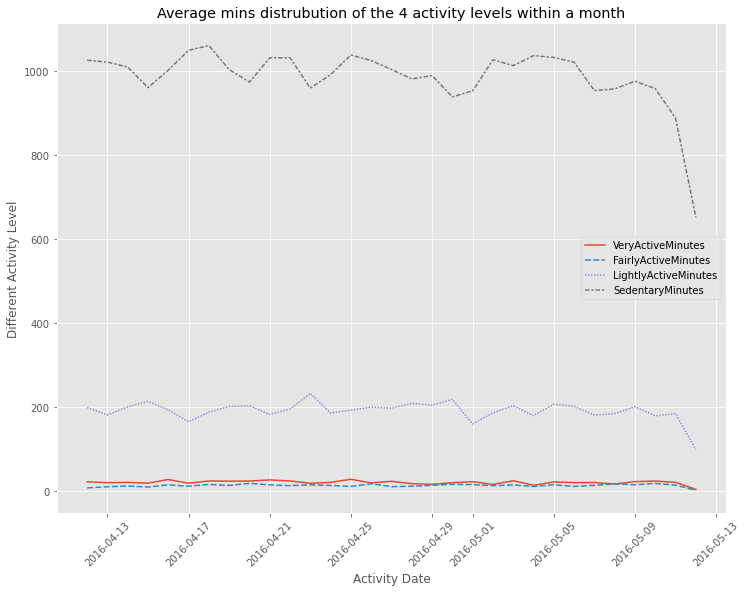

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 9))
plt.xticks(rotation = 45)
plt.xlabel('Activity Date')
plt.ylabel('Different Activity Level')
plt.title('Average mins distrubution of the 4 activity levels within a month')

avg_activity_level = daily_activity.groupby('ActivityDate')[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()

sns.lineplot(data=avg_activity_level)

plt.show()

### Answer 5

By looking at the Intensity level distribution within the month, the reading was very stable which means the user did not take any healthy improvment while using FitBit.

A longer observation period is recommended with different notication pushed to different user. So we can see any changes in activity level and the effectiveness of recommendations aforementioned.

<AxesSubplot:title={'center':'Intersity of exercise activity'}, xlabel='Activity level', ylabel='Distance'>

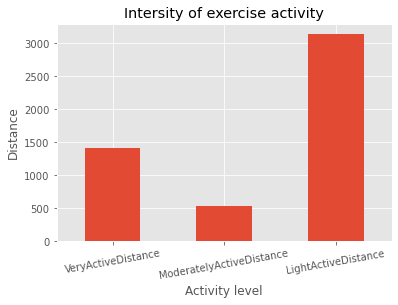

In [28]:
# What is the distribution of exercise activity intensity?

plt.xlabel('Activity level')
plt.ylabel('Distance')
plt.title('Intersity of exercise activity')

daily_activity[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']].sum().plot(kind='bar', rot=10)


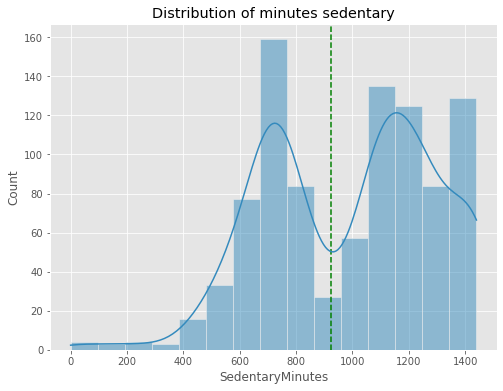

In [29]:
plt.figure(figsize=(8,6))
plt.title('Distribution of minutes sedentary')
plt.axvline(x=925, color='green', linestyle='--')
# sns.distplot(daily_activity['SedentaryMinutes'], kde=True)
sns.histplot(daily_activity['SedentaryMinutes'], kde=True)
plt.show()

<AxesSubplot:title={'center':'Distribution of daily activity level'}, ylabel='None'>

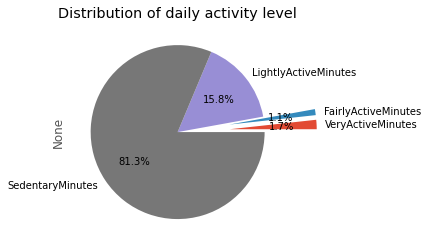

In [30]:
explodes = (0.6, 0.6, 0, 0)

plt.title('Distribution of daily activity level')
daily_activity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].sum().plot(kind='pie', autopct='%1.1f%%', explode = explodes)

### Daily Sleep dataset

In [31]:
# Add weekday as a new column for further analysis

daily_sleep['weekday'] = pd.to_datetime(daily_sleep['SleepDay']).dt.day_name()

daily_sleep['weekday'] = pd.Categorical(daily_sleep['weekday'], 
                                        categories= ['Monday','Tuesday','Wednesday',
                                                     'Thursday','Friday','Saturday', 'Sunday'],
                                        ordered=True)

### Question 6: What's the relationship between minutes asleep and time in bed?

/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


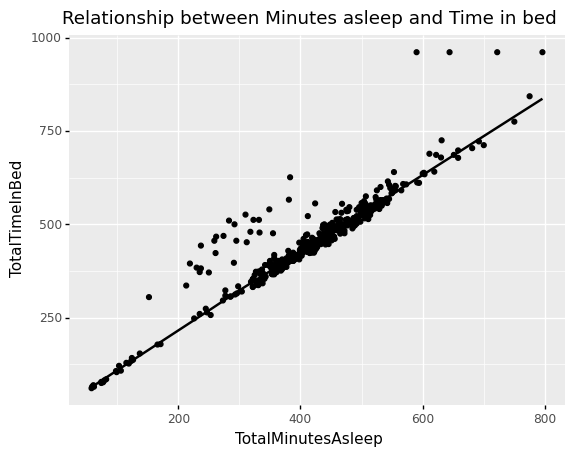

/opt/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


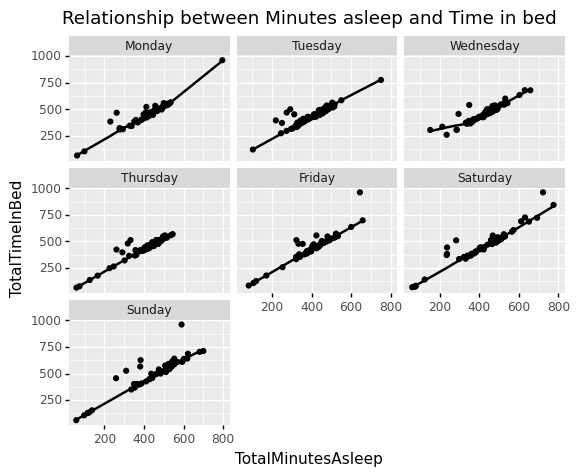

<ggplot: (8780493468648)>

In [32]:

print(ggplot(daily_sleep, aes(x='TotalMinutesAsleep', y='TotalTimeInBed')) + 
 geom_point() + 
 geom_smooth() + 
 ggtitle('Relationship between Minutes asleep and Time in bed')
)



(ggplot(daily_sleep, aes(x='TotalMinutesAsleep', y='TotalTimeInBed')) + 
 geom_point() + 
 geom_smooth() + 
 ggtitle('Relationship between Minutes asleep and Time in bed') +
 facet_wrap('weekday')
)

### Answer 6:

The relationship between Total Minutes Asleep and Total Time in Bed looks positive and stable across week.
 
So if the Bellabeat users want to improve their sleep, we should consider using notification to urge users go to bed.

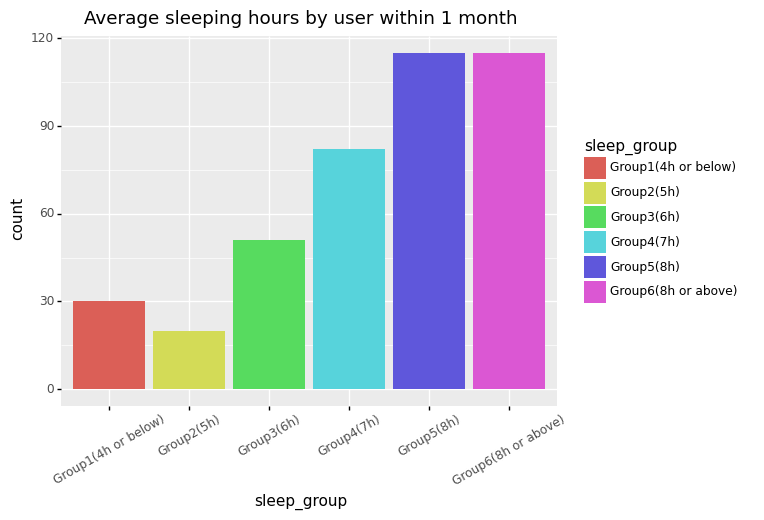

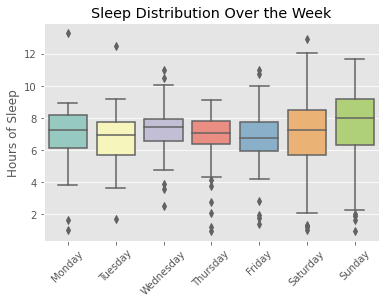

In [33]:
daily_sleep['sleep_hour'] = daily_sleep['TotalMinutesAsleep']/60

conditions = [
    (daily_sleep['sleep_hour'] <= 4),
    ((daily_sleep['sleep_hour'] > 4) & (daily_sleep['sleep_hour'] <= 5)),
    ((daily_sleep['sleep_hour'] > 5) & (daily_sleep['sleep_hour'] <= 6)),
    ((daily_sleep['sleep_hour'] > 6) & (daily_sleep['sleep_hour'] <= 7)),
    ((daily_sleep['sleep_hour'] > 7) & (daily_sleep['sleep_hour'] <= 8)),
    (daily_sleep['sleep_hour'] > 8),
]

choices = ['Group1(4h or below)', 'Group2(5h)', 'Group3(6h)', 'Group4(7h)', 'Group5(8h)', 'Group6(8h or above)']

daily_sleep['sleep_group'] = np.select(conditions, choices)

print(ggplot(daily_sleep, aes(x='sleep_group', fill='sleep_group')) + 
 geom_bar() +
 theme(axis_text_x = element_text(angle = 30))+
 ggtitle('Average sleeping hours by user within 1 month')
)

# (ggplot(daily_sleep, aes(x='sleep_group', fill='sleep_group')) + 
#  geom_bar() + 
#  facet_wrap('weekday') +
#  theme(axis_text_x=element_blank())
# )

#Sleep
## plot the dots over the violin plot.
sns.boxplot(x = 'weekday', y = 'sleep_hour', data = daily_sleep, palette = 'Set3')
#  ## plot the dots over the box plots.
# sns.swarmplot(x='weekday',
#                y='sleep_hour', 
#               data=daily_sleep, 
#               color='k',  #black dots
#               alpha = 0.5)
# Customize Graph
plt.title("Sleep Distribution Over the Week")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Hours of Sleep")
plt.show()

### Question 7: Are users building up a sleep deficit? Do they need more sleep the night after they don't get a lot of sleep?

In [34]:

daily_sleep['sleep_hour_prev'] = daily_sleep.groupby('Id')['sleep_hour'].shift(1)

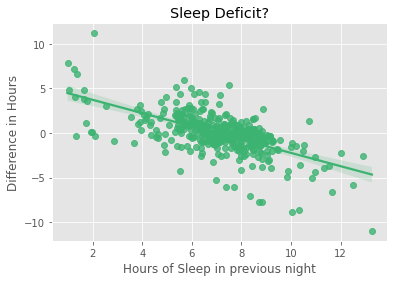

In [35]:
daily_sleep["hours_diff"] = daily_sleep.sleep_hour - daily_sleep.sleep_hour_prev

# Plot how much more I slept each night vs. amount slept night before
sns.regplot(x = daily_sleep.sleep_hour_prev, y = daily_sleep.hours_diff, color = "mediumseagreen")
plt.title("Sleep Deficit?")
plt.ylabel("Difference in Hours")
plt.xlabel("Hours of Sleep in previous night")
plt.show()

In [36]:


mod1 = smf.ols(formula = 'hours_diff ~ sleep_hour_prev', data = daily_sleep).fit()
mod1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,5.2147,0.360,14.490,0.000,4.507,5.922
sleep_hour_prev,-0.7443,0.049,-15.123,0.000,-0.841,-0.647


### Answer 7

There is a negative relationship which indicated that users are building up a sleep deficit. Again it's something worth mentioning together with Question 6 in notification. And linear regression confirms this finding with significant result

### hourly activity dataset

### Qusetion 8: What's the user average intensity minutes during the day?

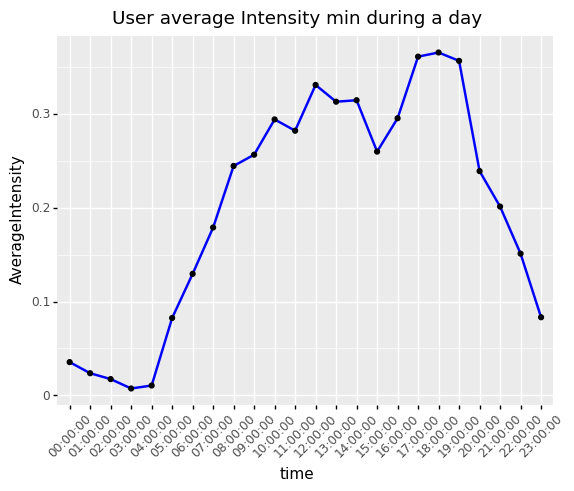

<ggplot: (8780444207987)>

In [37]:
(ggplot(hourly_activity.groupby('time', as_index=False)['AverageIntensity'].mean(), 
        aes(x='time', y='AverageIntensity', group=1)) +
 geom_line(colour='blue', size=1)+
 geom_point()+
 theme(axis_text_x = element_text(angle = 45))+
 ggtitle('User average Intensity min during a day')
)

### Answer 8

Most activity happens between 5 pm and 7 pm - I suppose, that people go to a gym or for a walk after finishing work. 

We can use this time in the Bellabeat app to remind and motivate users to go for a run or walk.

### Calory dataset

In [38]:
daily_activity['Calories'].value_counts(bins=5)

(1960.0, 2940.0]               442
(980.0, 1960.0]                312
(2940.0, 3920.0]               150
(3920.0, 4900.0]                24
(-4.901000000000001, 980.0]     12
Name: Calories, dtype: int64

In [39]:
conditions = [
    (daily_activity['Calories'] <= 1200),
    ((daily_activity['Calories'] > 1200) & (daily_activity['Calories'] <= 1600)),
    ((daily_activity['Calories'] > 1600) & (daily_activity['Calories'] <= 2000)),
    ((daily_activity['Calories'] > 2000) & (daily_activity['Calories'] <= 2400)),
    ((daily_activity['Calories'] > 2400) & (daily_activity['Calories'] <= 2800)),
    (daily_activity['Calories'] > 2800),
]

choices = ['Group1(1200 or below)', 
           'Group2(1201-1600)', 
           'Group3(1601-2000)', 
           'Group4(2001-2400)', 
           'Group5(2401-2800)', 
           'Group6(2800 or above)']

daily_activity['calory_group'] = np.select(conditions, choices)

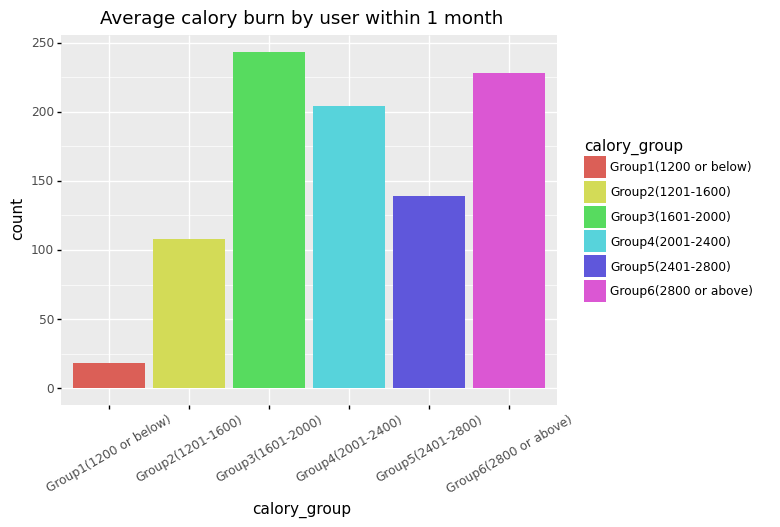

<ggplot: (8780491225974)>

In [40]:
(ggplot(daily_activity, aes(x='calory_group', y='..count..', fill='calory_group')) + 
 geom_bar()+
 theme(axis_text_x = element_text(angle = 30))+
 ggtitle('Average calory burn by user within 1 month'))

### weightlog dataset

In [41]:
weightlog

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,day,time
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000,2016-05-02,23:59:59
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000,2016-05-03,23:59:59
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000,2016-04-13,01:08:52
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000,2016-04-21,23:59:59
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000,2016-05-12,23:59:59
...,...,...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06 06:43:35,85.000000,187.392923,NaN,25.440001,False,1462517015000,2016-05-06,06:43:35
63,8877689391,2016-05-08 07:35:53,85.400002,188.274775,NaN,25.559999,False,1462692953000,2016-05-08,07:35:53
64,8877689391,2016-05-09 06:39:44,85.500000,188.495234,NaN,25.610001,False,1462775984000,2016-05-09,06:39:44
65,8877689391,2016-05-11 06:51:47,85.400002,188.274775,NaN,25.559999,False,1462949507000,2016-05-11,06:51:47


### Merged dataset

In [42]:
# Merging these two datasets together

merged_data = daily_activity.merge(daily_sleep, how = 'left', left_on = ['Id', 'ActivityDate'], right_on = ['Id', 'SleepDay'])

print(daily_activity.shape, merged_data.shape)

merged_data = merged_data.merge(weightlog, how='left',
                                left_on = ['Id', 'ActivityDate'],
                                right_on = ['Id', 'day'])

print(merged_data['Id'].nunique())

print(daily_activity.shape, merged_data.shape)

(940, 18) (943, 27)
33
(940, 18) (943, 36)


### Question 9: Do participants who sleep more also take more steps or fewer steps per day? Is there a relationship at all? 

/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 530 rows containing missing values.


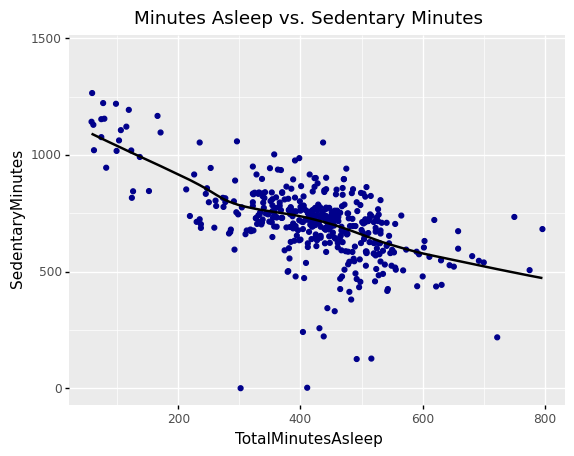

<ggplot: (8780511847647)>

In [43]:
(ggplot(merged_data, aes(x='TotalMinutesAsleep', y='SedentaryMinutes')) + 
geom_point(color='darkblue') + geom_smooth() +
labs(title="Minutes Asleep vs. Sedentary Minutes"))

In [44]:
mod2 = smf.ols(formula = 'SedentaryMinutes ~ TotalMinutesAsleep', data = merged_data).fit()
mod2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1064.7502,24.130,44.126,0.000,1017.317,1112.183
TotalMinutesAsleep,-0.8405,0.055,-15.181,0.000,-0.949,-0.732


### Answer 9

Here we can clearly see the negative relationship between Sedentary Minutes and Sleep time.

As an idea: if Bellabeat users want to improve their sleep, Bellabeat app can recommend reducing sedentary time.

And the regression result is significant

### Question 10: How about Sleep vs Distance Covered?

In [45]:
# Sleep vs distance covered
mod3 = smf.ols(formula = 'TotalMinutesAsleep ~ TotalDistance', data = merged_data).fit()
mod3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,459.7753,12.745,36.075,0.000,434.722,484.829
TotalDistance,-6.6750,1.884,-3.543,0.000,-10.379,-2.971


<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='TotalDistance'>

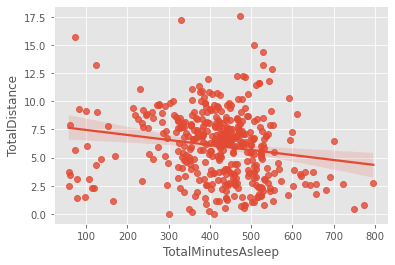

In [46]:
sns.regplot(data=merged_data, x='TotalMinutesAsleep', y='TotalDistance')

### Answer 10

Again similar with observation in Sleep vs Sedentary Minutes. 

### Question 11: Do users fall asleep easier if they walk more?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


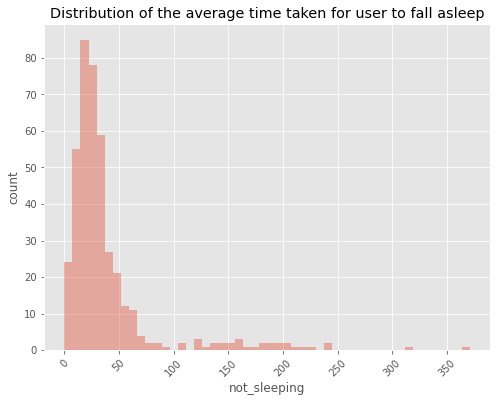

In [47]:
merged_data['not_sleeping'] = merged_data['TotalTimeInBed'] - merged_data['TotalMinutesAsleep']

plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.xticks(rotation = 45)
#plt.xlabel('not_sleeping')
plt.ylabel('count')
plt.title('Distribution of the average time taken for user to fall asleep')

sns.distplot(merged_data['not_sleeping'], kde=False)

plt.show()

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,38.6218,5.091,7.586,0.000,28.614,48.630
TotalDistance,0.0911,0.753,0.121,0.904,-1.388,1.571


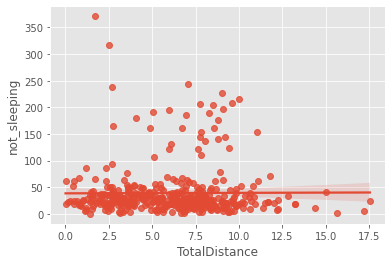

In [48]:
sns.regplot(data=merged_data, x='TotalDistance', y='not_sleeping')

mod4 = smf.ols(formula = 'not_sleeping ~ TotalDistance', data = merged_data).fit()
mod4.summary().tables[1]

### Answer 11 

No relationship between distance and not sleeping time is observed. 

(Here we use time not sleeping as a proxy. In reality, not sleeping time while in bed could be wake up or not able to fall asleep. More data and new measurement method is needed for this conclusion)

### Question 12: What is the relationship between weight and total distance?

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2.4420,3.529,-0.692,0.491,-9.490,4.606
WeightKg,0.1618,0.048,3.362,0.001,0.066,0.258


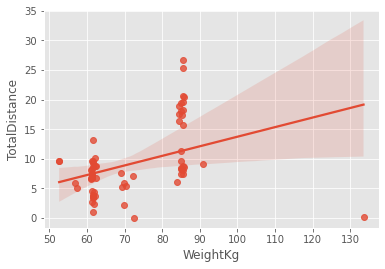

In [49]:
sns.regplot(data=merged_data, x='WeightKg', y='TotalDistance')

mod4 = smf.ols(formula = 'TotalDistance ~ WeightKg', data = merged_data).fit()
mod4.summary().tables[1]

### Answer 12

A good sign is that a positive relationship between weight and distance is observed. It might indicated that overweight people are more aware of their health.

### Question 13: Does the amount of sleep I get the night before predict my activity level?

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.072e+04,805.995,13.301,0.000,9135.619,1.23e+04
sleep_hour_prev,-303.4885,110.221,-2.753,0.006,-520.196,-86.781


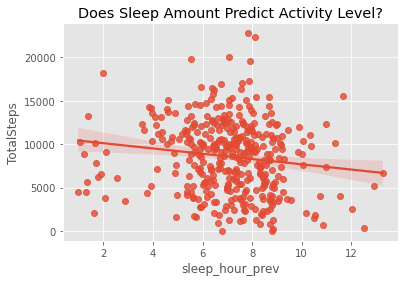

In [50]:
plt.xlabel("Daily Steps")
plt.ylabel("Hours of Sleep")
plt.title("Does Sleep Amount Predict Activity Level?")

sns.regplot(data=merged_data, x='sleep_hour_prev', y='TotalSteps')

mod4 = smf.ols(formula = 'TotalSteps ~ sleep_hour_prev', data = merged_data).fit()
mod4.summary().tables[1]

### Answer 13

A significant negative relationship is observed. But if we look at the sleep hour between 6 and 8 the total step is close to 10k which is the ideal to both dimension.

### 5. Share - Supporting visulization and key findings
> - Were you able to answer the business questions?
> - What story does your data tell?
> - How do your findings relate to your original question?
> - Who is your audience? What is the best way to communicate with them?
> - Can data visualization help you share your findings?
> - Is your presentation accessible to your audience?

### 6. Act - Top three recommedation based on my analysis
> - What is your final conclusion based on your analysis?
> - How could your team and business apply your insights?
> - What next steps would you or your stakeholders take based on your findings?
> - Is there additional data you could use to expand on your findings?


### Recommendation 1: Product Improvement

By looking at the missing value from the dataset, we can see that user did not use the device during sleeping.

Bellabeat can smaller the size the device(Leaf) which user can put it 24/7 as part the body like a necklace.

Combined with the minimal record observed in heartrate and weightlog dataset, it also indicated that the functionality of the device (Time) needs improvement.


### Recommendation 2: Activity Notification

For user with daily steps less than 10k, a negative relationship is observed between steps and sedentary minutes. While for user with daily step more than 10k, a positive relationship is observed instead. 

A recommedation here is we can nudge user with <= 10k steps by encouraging user to take lunch break walk by notifying them on the app or providing shopping discount to encourage user to walk to a fair distance shop given a negative relationship is observed. For the postive relationship after 10k, it indicated that once the habit forms it tends to stick. 

Together with the negative relationship between Sedentary Minutes and Sleep time, as an idea: if Bellabeat users want to improve their sleep, Bellabeat app can recommend reducing sedentary time.

And the regression result is significant


### Recommendation 3: Bed Time Notification

The relationship between Total Minutes Asleep and Total Time in Bed looks positive and stable across week.
 
So if the Bellabeat users want to improve their sleep, we should consider using notification to urge users go to bed.

And there is a negative relationship which indicated that users are building up a sleep deficit. It's something worth mentioning together with the bed time notification. And linear regression confirms this finding with significant result.